In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

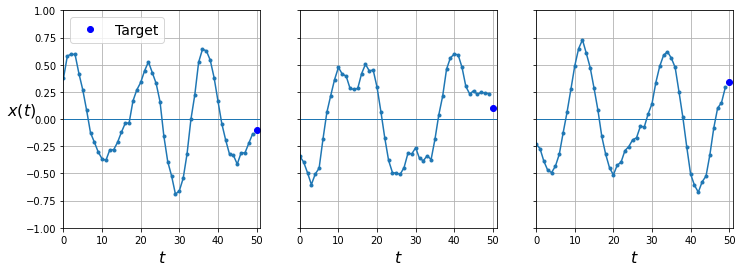

In [4]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

In [5]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020736251

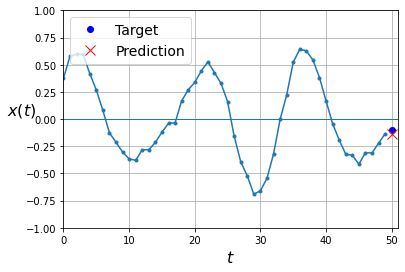

In [6]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(50, 1)),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_valid, y_valid)

Epoch 1/10
219/219 [==============================] - 2s 4ms/step - loss: 0.1012 - val_loss: 0.0340
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0209 - val_loss: 0.0126
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0098 - val_loss: 0.0075
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 8/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0039


0.0039297747425735

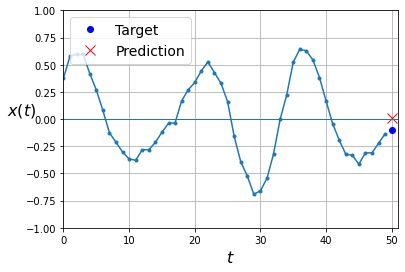

In [8]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [9]:
keras.backend.clear_session()

model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(1, input_shape=(None, 1))
])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.005))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 17s 73ms/step - loss: 0.6676 - val_loss: 0.4282
Epoch 2/10
219/219 [==============================] - 16s 72ms/step - loss: 0.3402 - val_loss: 0.2119
Epoch 3/10
219/219 [==============================] - 16s 74ms/step - loss: 0.1639 - val_loss: 0.1406
Epoch 4/10
219/219 [==============================] - 16s 73ms/step - loss: 0.1481 - val_loss: 0.1642
Epoch 5/10
219/219 [==============================] - 16s 73ms/step - loss: 0.1495 - val_loss: 0.1391
Epoch 6/10
219/219 [==============================] - 16s 73ms/step - loss: 0.1475 - val_loss: 0.1372
Epoch 7/10
219/219 [==============================] - 16s 73ms/step - loss: 0.1478 - val_loss: 0.1422
Epoch 8/10
219/219 [==============================] - 16s 75ms/step - loss: 0.1475 - val_loss: 0.1371
Epoch 9/10
219/219 [==============================] - 16s 74ms/step - loss: 0.1495 - val_loss: 0.1420
Epoch 10/10
219/219 [==============================] - 16s 73ms/step - loss: 0.112

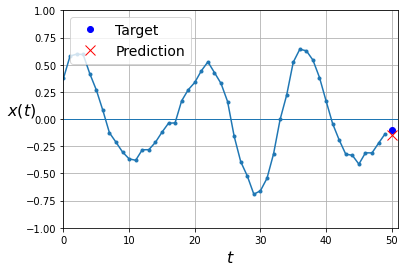

In [10]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [11]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 64s 287ms/step - loss: 0.0147 - val_loss: 0.0037
Epoch 2/10
219/219 [==============================] - 64s 291ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 3/10
219/219 [==============================] - 64s 290ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 4/10
219/219 [==============================] - 62s 283ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 5/10
219/219 [==============================] - 62s 285ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 6/10
219/219 [==============================] - 62s 283ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/10
219/219 [==============================] - 62s 284ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 8/10
219/219 [==============================] - 65s 296ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/10
219/219 [==============================] - 66s 301ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/10
219/219 [==============================] - 63s 286ms/step - l

In [12]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 40s 178ms/step - loss: 0.0223 - val_loss: 0.0068
Epoch 2/10
219/219 [==============================] - 40s 184ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 3/10
219/219 [==============================] - 41s 185ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 4/10
219/219 [==============================] - 40s 182ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/10
219/219 [==============================] - 40s 183ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/10
219/219 [==============================] - 40s 185ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/10
219/219 [==============================] - 41s 186ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/10
219/219 [==============================] - 41s 186ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 9/10
219/219 [==============================] - 40s 184ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/10
219/219 [==============================] - 40s 184ms/step - l

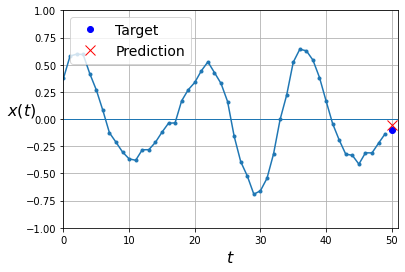

In [13]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [14]:
series = generate_time_series(1, n_steps+10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

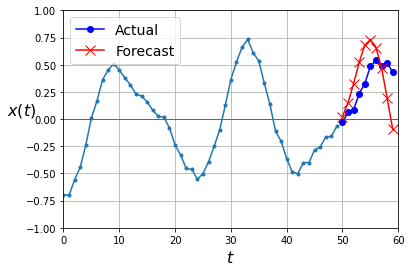

In [15]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [16]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [17]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

In [18]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.035308737

In [19]:
Y_naive_pred = np.tile(X_valid[:, -1], 10)
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.25341412

In [20]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 41s 181ms/step - loss: 0.0613 - val_loss: 0.0265
Epoch 2/5
219/219 [==============================] - 39s 177ms/step - loss: 0.0215 - val_loss: 0.0159
Epoch 3/5
219/219 [==============================] - 39s 180ms/step - loss: 0.0163 - val_loss: 0.0134
Epoch 4/5
219/219 [==============================] - 39s 178ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 5/5
219/219 [==============================] - 39s 177ms/step - loss: 0.0131 - val_loss: 0.0142


In [21]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

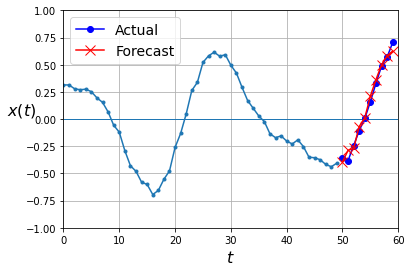

In [22]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [23]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [24]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 40s 179ms/step - loss: 0.0504 - last_time_step_mse: 0.0395 - val_loss: 0.0368 - val_last_time_step_mse: 0.0227
Epoch 2/5
219/219 [==============================] - 39s 179ms/step - loss: 0.0347 - last_time_step_mse: 0.0212 - val_loss: 0.0313 - val_last_time_step_mse: 0.0174
Epoch 3/5
219/219 [==============================] - 39s 180ms/step - loss: 0.0303 - last_time_step_mse: 0.0171 - val_loss: 0.0271 - val_last_time_step_mse: 0.0131
Epoch 4/5
219/219 [==============================] - 39s 178ms/step - loss: 0.0273 - last_time_step_mse: 0.0140 - val_loss: 0.0277 - val_last_time_step_mse: 0.0130
Epoch 5/5
219/219 [==============================] - 39s 180ms/step - loss: 0.0249 - last_time_step_mse: 0.0116 - val_loss: 0.0230 - val_last_time_step_mse: 0.0100


In [25]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

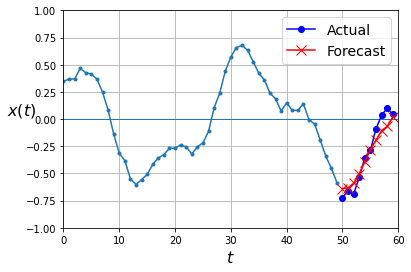

In [26]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [27]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 42s 185ms/step - loss: 0.1400 - last_time_step_mse: 0.1319 - val_loss: 0.0797 - val_last_time_step_mse: 0.0730
Epoch 2/5
219/219 [==============================] - 41s 186ms/step - loss: 0.0524 - last_time_step_mse: 0.0427 - val_loss: 0.0525 - val_last_time_step_mse: 0.0412
Epoch 3/5
219/219 [==============================] - 42s 191ms/step - loss: 0.0429 - last_time_step_mse: 0.0314 - val_loss: 0.0421 - val_last_time_step_mse: 0.0284
Epoch 4/5
219/219 [==============================] - 42s 192ms/step - loss: 0.0384 - last_time_step_mse: 0.0257 - val_loss: 0.0372 - val_last_time_step_mse: 0.0241
Epoch 5/5
219/219 [==============================] - 42s 192ms/step - loss: 0.0360 - last_time_step_mse: 0.0229 - val_loss: 0.0348 - val_last_time_step_mse: 0.0212


In [60]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]

    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [29]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 102s 444ms/step - loss: 0.1396 - last_time_step_mse: 0.1258 - val_loss: 0.0654 - val_last_time_step_mse: 0.0546
Epoch 2/5
219/219 [==============================] - 95s 436ms/step - loss: 0.0578 - last_time_step_mse: 0.0472 - val_loss: 0.0518 - val_last_time_step_mse: 0.0406
Epoch 3/5
219/219 [==============================] - 98s 446ms/step - loss: 0.0493 - last_time_step_mse: 0.0380 - val_loss: 0.0463 - val_last_time_step_mse: 0.0340
Epoch 4/5
219/219 [==============================] - 96s 436ms/step - loss: 0.0447 - last_time_step_mse: 0.0328 - val_loss: 0.0425 - val_last_time_step_mse: 0.0303
Epoch 5/5
219/219 [==============================] - 94s 431ms/step - loss: 0.0414 - last_time_step_mse: 0.0295 - val_loss: 0.0394 - val_last_time_step_mse: 0.0280


In [61]:
class MyRNN(keras.layers.Layer):
    def __init__(self, cell, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        self.cell = cell
        self.return_sequences = return_sequences
        self.get_initial_state = getattr(self.cell, "get_initial_state", self.fallback_initial_state)

    def fallback_initial_state(self, inputs):
        batch_size = tf.shape(inputs)[0]
        return [tf.zeros([batch_size, self.cell.state_size], dtype=inputs.dtype)]
    
    @tf.function
    def call(self, inputs):
        states = self.get_initial_state(inputs)
        shape = tf.shape(inputs)
        batch_size = shape[0]   
        n_steps = shape[1]
        sequences = tf.TensorArray(inputs.dtype, size=(n_steps if self.return_sequences else 0))
        outputs = tf.zeros(shape=[batch_size, self.cell.output_size], dtype=inputs.dtype)
        for step in tf.range(n_steps):
            outputs, states = self.cell(inputs[:, step], states)
            if self.return_sequences:
                sequences = sequences.write(step, outputs)
        if self.return_sequences:
            return tf.transpose(sequences.stack(), [1, 0, 2])
        else:
            return outputs

In [62]:
model = keras.models.Sequential([
    MyRNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    MyRNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 93s 420ms/step - loss: 0.1327 - last_time_step_mse: 0.1223 - val_loss: 0.0630 - val_last_time_step_mse: 0.0522
Epoch 2/5
219/219 [==============================] - 94s 430ms/step - loss: 0.0583 - last_time_step_mse: 0.0452 - val_loss: 0.0533 - val_last_time_step_mse: 0.0376
Epoch 3/5
219/219 [==============================] - 94s 430ms/step - loss: 0.0525 - last_time_step_mse: 0.0381 - val_loss: 0.0491 - val_last_time_step_mse: 0.0359
Epoch 4/5
219/219 [==============================] - 93s 427ms/step - loss: 0.0457 - last_time_step_mse: 0.0305 - val_loss: 0.0435 - val_last_time_step_mse: 0.0276
Epoch 5/5
219/219 [==============================] - 94s 430ms/step - loss: 0.0412 - last_time_step_mse: 0.0259 - val_loss: 0.0383 - val_last_time_step_mse: 0.0237


In [65]:
model = keras.models.Sequential([ 
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 12s 14ms/step - loss: 0.0791 - last_time_step_mse: 0.0652 - val_loss: 0.0556 - val_last_time_step_mse: 0.0381
Epoch 2/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0466 - last_time_step_mse: 0.0255 - val_loss: 0.0418 - val_last_time_step_mse: 0.0222
Epoch 3/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0391 - last_time_step_mse: 0.0180 - val_loss: 0.0367 - val_last_time_step_mse: 0.0157
Epoch 4/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0357 - last_time_step_mse: 0.0158 - val_loss: 0.0345 - val_last_time_step_mse: 0.0148
Epoch 5/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0334 - last_time_step_mse: 0.0142 - val_loss: 0.0323 - val_last_time_step_mse: 0.0125


In [68]:
model = keras.models.Sequential([ 
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 95s 427ms/step - loss: 0.0797 - last_time_step_mse: 0.0642 - val_loss: 0.0547 - val_last_time_step_mse: 0.0332
Epoch 2/5
219/219 [==============================] - 95s 433ms/step - loss: 0.0469 - last_time_step_mse: 0.0248 - val_loss: 0.0411 - val_last_time_step_mse: 0.0177
Epoch 3/5
219/219 [==============================] - 95s 435ms/step - loss: 0.0377 - last_time_step_mse: 0.0161 - val_loss: 0.0353 - val_last_time_step_mse: 0.0151
Epoch 4/5
219/219 [==============================] - 95s 434ms/step - loss: 0.0338 - last_time_step_mse: 0.0143 - val_loss: 0.0322 - val_last_time_step_mse: 0.0129
Epoch 5/5
219/219 [==============================] - 93s 427ms/step - loss: 0.0316 - last_time_step_mse: 0.0132 - val_loss: 0.0307 - val_last_time_step_mse: 0.0129


In [71]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

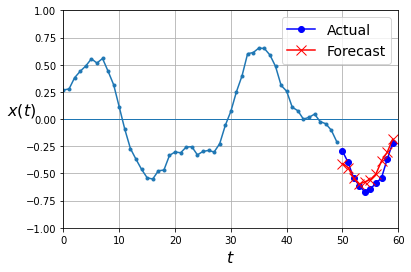

In [72]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [74]:
model = keras.models.Sequential([ 
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 5s 11ms/step - loss: 0.0755 - last_time_step_mse: 0.0680 - val_loss: 0.0527 - val_last_time_step_mse: 0.0423
Epoch 2/5
219/219 [==============================] - 2s 8ms/step - loss: 0.0487 - last_time_step_mse: 0.0387 - val_loss: 0.0456 - val_last_time_step_mse: 0.0353
Epoch 3/5
219/219 [==============================] - 2s 8ms/step - loss: 0.0439 - last_time_step_mse: 0.0329 - val_loss: 0.0410 - val_last_time_step_mse: 0.0298
Epoch 4/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0385 - last_time_step_mse: 0.0262 - val_loss: 0.0356 - val_last_time_step_mse: 0.0218
Epoch 5/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0326 - last_time_step_mse: 0.0186 - val_loss: 0.0310 - val_last_time_step_mse: 0.0169


In [75]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

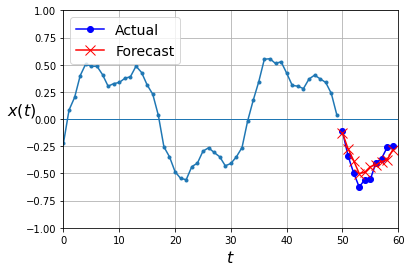

In [76]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [77]:
model = keras.models.Sequential([ 
    keras.layers.Conv1D(20, 4, strides=2, padding="valid", input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train[:, 3::2], epochs=5, validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/5
219/219 [==============================] - 9s 12ms/step - loss: 0.0681 - last_time_step_mse: 0.0599 - val_loss: 0.0459 - val_last_time_step_mse: 0.0368
Epoch 2/5
219/219 [==============================] - 2s 10ms/step - loss: 0.0395 - last_time_step_mse: 0.0322 - val_loss: 0.0350 - val_last_time_step_mse: 0.0292
Epoch 3/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0318 - last_time_step_mse: 0.0235 - val_loss: 0.0298 - val_last_time_step_mse: 0.0207
Epoch 4/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0279 - last_time_step_mse: 0.0184 - val_loss: 0.0265 - val_last_time_step_mse: 0.0160
Epoch 5/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0254 - last_time_step_mse: 0.0149 - val_loss: 0.0246 - val_last_time_step_mse: 0.0140


In [80]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(20, 2, padding="causal", activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(10, 1))

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 4s 13ms/step - loss: 0.0697 - last_time_step_mse: 0.0583 - val_loss: 0.0360 - val_last_time_step_mse: 0.0235
Epoch 2/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0330 - last_time_step_mse: 0.0198 - val_loss: 0.0312 - val_last_time_step_mse: 0.0181
Epoch 3/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0291 - last_time_step_mse: 0.0166 - val_loss: 0.0304 - val_last_time_step_mse: 0.0193
Epoch 4/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0270 - last_time_step_mse: 0.0150 - val_loss: 0.0256 - val_last_time_step_mse: 0.0135
Epoch 5/5
219/219 [==============================] - 2s 11ms/step - loss: 0.0256 - last_time_step_mse: 0.0137 - val_loss: 0.0248 - val_last_time_step_mse: 0.0134


In [81]:
class GatedActivationUnit(keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

In [82]:
def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal", dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return keras.layers.Add()([z, inputs]), z

In [83]:
n_layers_per_block = 3
n_blocks = 1
n_filters = 32
n_outputs = 10

inputs = keras.layers.Input(shape=[None, 1])
z = keras.layers.Conv1D(n_filters, kernel_size=2, padding="causal")(inputs)
skip_to_last = []
for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
    z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
    skip_to_last.append(skip)
z = keras.activations.relu(keras.layers.Add()(skip_to_last))
z = keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
Y_proba = keras.layers.Conv1D(n_outputs, kernel_size=1, activation="softmax")(z)

model = keras.models.Model(inputs=[inputs], outputs=[Y_proba])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 4s 13ms/step - loss: 0.1295 - last_time_step_mse: 0.1237 - val_loss: 0.1230 - val_last_time_step_mse: 0.1173
Epoch 2/5
219/219 [==============================] - 2s 11ms/step - loss: 0.1220 - last_time_step_mse: 0.1159 - val_loss: 0.1218 - val_last_time_step_mse: 0.1159
Epoch 3/5
219/219 [==============================] - 3s 12ms/step - loss: 0.1215 - last_time_step_mse: 0.1155 - val_loss: 0.1214 - val_last_time_step_mse: 0.1156
Epoch 4/5
219/219 [==============================] - 3s 13ms/step - loss: 0.1212 - last_time_step_mse: 0.1152 - val_loss: 0.1212 - val_last_time_step_mse: 0.1155
Epoch 5/5
219/219 [==============================] - 3s 12ms/step - loss: 0.1210 - last_time_step_mse: 0.1149 - val_loss: 0.1210 - val_last_time_step_mse: 0.1151
